- HSV 색상공간의 구성

 <img src="../myCode/openCV/lecture_image/hsv.png" width=70%>

- 색상 값 
  - Hue 값은 0-179 범위로 설정
  - 만약 Hue 값을 -로 설정하면 뒤쪽부터 인덱싱됨

<img src="../myCode/openCV/lecture_image/hsv2.png" width=50%>

<table style="border-collapse: collapse; width: 100%; height: 140px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 20px;">
<td style="width: 13.6047%; text-align: center; height: 20px;"><b>명칭</b></td>
<td style="width: 11.5115%; text-align: center; height: 20px;"><b>값의 범위</b></td>
<td style="width: 49.8837%; text-align: center; height: 20px;"><b>참고</b></td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>색상(H)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 180</td>
<td style="width: 49.8837%; height: 40px;">원래 0~360범위이지만 OpenCV에서는 1/2 범위이다</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>채도(S)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 하얀색, 255에 가까울수록 H의 색상이 된다.</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>명도(V)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 검은색, 255에 가까울수록 &nbsp;H의 색상이 된다.</td>
</tr>
</tbody>

# 중심점 검출

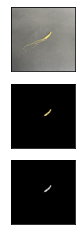

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../myCode/openCV/image/insam.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.subplot(3,1,1)
plt.xticks([]); plt.yticks([])
plt.imshow(img)

# 색상, 채도, 명도 순
lower = np.array([20, 100,200])
higher = np.array([30, 255, 255])
mask = cv2.inRange(hsv, lower, higher)
img_hsv = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(3,1,2)
plt.xticks([]); plt.yticks([])
plt.imshow(img_hsv)

plt.subplot(3,1,3)
img_gray = cv2.cvtColor(img_hsv, cv2.COLOR_RGB2GRAY)
plt.xticks([]); plt.yticks([])
plt.imshow(img_gray,cmap='gray')

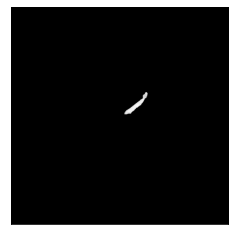

In [19]:
#침식
kernel = np.ones((3,3), np.uint8)
# interations : 수행 횟수 (클수록 글씨들이 얇아짐)
img_gray = cv2.erode(img_gray, kernel, iterations=1)

#팽창 (마스크 크게 만들 수 있음, 마스크 노이즈 제거 가능)
kernel = np.ones((3,3), np.uint8)
# deilate : 수행 횟수 (클수록 글씨들이 두꺼워짐)
img_gray = cv2.dilate(img_gray, kernel, iterations=3)
img_gray = cv2.erode(img_gray, kernel, iterations=3)
plt.xticks([]); plt.yticks([])
plt.imshow(img_gray, cmap='gray')

In [20]:
obj=[]

for x in range(640):
    y = 0
    i = img_gray[x]  
    for j in i:
        if j > 0:
            obj.append([x,y,j])
        y += 1
        
yy = 0
for i in range(len(obj)):
    yy += obj[i][0]
    print(yy)
yy = yy // len(obj)

xx = 0
for i in range(len(obj)):
    xx += obj[i][1]
xx = xx // len(obj)

print(f'({xx},{yy})')

253
506
759
1012
1266
1520
1774
2028
2282
2536
2791
3046
3301
3556
3811
4066
4321
4577
4833
5089
5345
5601
5857
6113
6369
6626
6883
7140
7397
7654
7911
8168
8425
8683
8941
9199
9457
9715
9973
10231
10489
10747
11006
11265
11524
11783
12042
12301
12560
12819
13078
13337
13596
13856
14116
14376
14636
14896
15156
15416
15676
15936
16196
16456
16717
16978
17239
17500
17761
18022
18283
18544
18805
19066
19327
19588
19850
20112
20374
20636
20898
21160
21422
21684
21946
22208
22470
22732
22994
23257
23520
23783
24046
24309
24572
24835
25098
25361
25624
25887
26150
26413
26677
26941
27205
27469
27733
27997
28261
28525
28789
29053
29317
29581
29845
30110
30375
30640
30905
31170
31435
31700
31965
32230
32495
32760
33025
33291
33557
33823
34089
34355
34621
34887
35153
35419
35685
35951
36218
36485
36752
37019
37286
37553
37820
38087
38354
38621
38888
39156
39424
39692
39960
40228
40496
40764
41032
41300
41568
41836
42105
42374
42643
42912
43181
43450
43719
43988
44257
44526
44796
45066
45336
4560

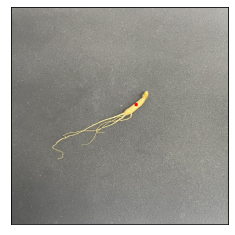

In [10]:
img_to_point = cv2.circle(img, (xx, yy),5,(255,0,0), -1)
plt.xticks([]); plt.yticks([])
plt.imshow(img_to_point)

In [14]:
obj

[[253, 395, 197],
 [253, 396, 205],
 [253, 397, 205],
 [253, 398, 212],
 [254, 394, 188],
 [254, 395, 197],
 [254, 396, 205],
 [254, 397, 205],
 [254, 398, 212],
 [254, 399, 211],
 [255, 393, 186],
 [255, 394, 188],
 [255, 395, 200],
 [255, 396, 205],
 [255, 397, 205],
 [255, 398, 212],
 [255, 399, 211],
 [256, 393, 186],
 [256, 394, 188],
 [256, 395, 212],
 [256, 396, 212],
 [256, 397, 213],
 [256, 398, 212],
 [256, 399, 211],
 [256, 400, 211],
 [257, 393, 186],
 [257, 394, 204],
 [257, 395, 204],
 [257, 396, 204],
 [257, 397, 217],
 [257, 398, 212],
 [257, 399, 211],
 [257, 400, 211],
 [258, 392, 162],
 [258, 393, 186],
 [258, 394, 196],
 [258, 395, 199],
 [258, 396, 204],
 [258, 397, 211],
 [258, 398, 212],
 [258, 399, 211],
 [258, 400, 207],
 [259, 390, 189],
 [259, 391, 189],
 [259, 392, 189],
 [259, 393, 189],
 [259, 394, 196],
 [259, 395, 199],
 [259, 396, 204],
 [259, 397, 204],
 [259, 398, 204],
 [259, 399, 204],
 [259, 400, 207],
 [260, 389, 192],
 [260, 390, 192],
 [260, 391

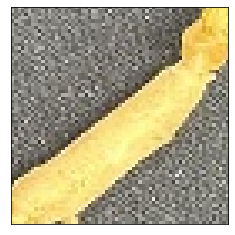

In [23]:
img_resize = img[253:318,335:400]
plt.xticks([]); plt.yticks([])
plt.imshow(img_resize)

In [24]:
img_resize.shape

(65, 65, 3)

## ROI에 도형 그리기

- <font color=red>cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께)</font> : 직선 그리기

<img src="../myCode/openCV/lecture_image/06_line.png" width=40%>  

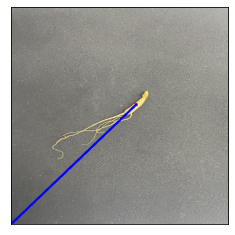

In [11]:
line_img = cv2.line(img, (0, 640),(xx, yy),(0,0,255), 5)
plt.xticks([]); plt.yticks([])
plt.imshow(line_img)

# 원검출

- <font color=red>cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, minDis, param1, param2, minRadius, maxRadius)</font>
  - cv2.HOUGH_GRADIENT : 원을 찾는 방법
  - 1 : 원이미지와 허프변환 이미지 간의비율 (1로 설정)
  - minDist : 원 중심들 간의 최소 거리 (0보다 커야 함)
  - param1 : Canny 에지 추출자의 maxVal 값
  - parma2 : 허프변환 카운팅 값 (너무 작으면 원하지 않는 많은 원들이 검출됨)
  - minRadius : 원의 최소 반지름
  - maxRadius : 원의 최대 반지름
  
  
- 원리
  - 이미지에서 에지를 계산
  - 에지에 법선을 긋고 (기울기) 직각인 선을 그림  , 법선:?
    - 설정한 반지름의 범위에 따라 여러 개의 선을 그림
  - 가장 선이 많이 만나는 점에 해당하는 반지름 크기의 원을 찾음  
  
<img src="../myCode/openCV/lecture_image/12_hough03.png" width=30%>  

In [ ]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

img = cv2.imread('./image/insam3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 원 찾기
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, dp=1,
                           minDist=10, param1=60, param2=95,
                           minRadius=10, maxRadius=100)

# 중심점 좌표와 반지름을 반환
print(circles)

if circles is not None:
    # 좌표는 정수값이므로 실수를 정수로 변환해주는 작업
    circles =np.uint16(np.around(circles))  # aroundd는 반올림해주는 함수

    # 원그리기
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0,0,255), 4)
                   
    plt.imshow(img)
    plt.axis("off")

# 직선 검출

- <font color=red>cv2.HoughLines(image, rho, theta, threshold)</font>
  - image : single-channel binary image, canny edge를 적용한 이미지
  - rho : r 값의 범위 (0 ~ 1 실수)
  - theta : 𝜃 값의 범위(0 ~ 180 정수)
  - threshold : 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고 숫자가 크면 정확도가 올라감

In [ ]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

img = cv2.imread('./image/conv2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 에지를 검출하고 에지 이미지에서 선을 검출
dst = cv2.Canny(img_gray, 150, 200)

plt.imshow(dst)

# # 선 검출
# lines = cv2.HoughLines(dst, 1, np.pi/180, 100)  #200최소 200개가 겹쳐야 선으로 인정하겠다?

# # 검출된 선을 그린다
# if lines is not None: #선을 찾았다면
#     # 검색된 선의 수 만큼 반복
#     for i in range(0, len(lines)):
#         # 각도와 길이를 가져온다
#         # [0][0] : 가장 가능성이 높은 각도와 길이를 가져온다.
#         rho = lines[i][0][0] 
#         theta = lines[i][0][1]
        
#         # 시작접과 끝점을 그리기 위해서 x,y축의 삼각비를 계산
#         tx = math.cos(theta)
#         ty = math.sin(theta)
        
#         # 단위 좌표 출력
#         x0 = rho * tx
#         y0 = rho * ty

#         # 기준좌표를 이용해서 선의 시작점과 끝점을 계산
#         d = 1500  #충분시 선을 길게 표시하기 위한 값 (임의 값)
#         x1 = int(x0 + d*(-ty))
#         y1 = int(y0 + d*(tx))
#         x2 = int(x0 - d*(-ty))
#         y2 = int(y0 - d*(tx))
        
#         cv2.line(img, (x1, y1), (x2, y2), (0,0,255), 30, cv2.LINE_AA)
        
# plt.imshow(img)
# plt.axis("off")
        

# 동영상 객체 추적

- <font color=red>ret, win = cv2.CamShift(probImage, window, criteria)</font>
  - probImage: 관심 객체에 대한 히스토그램 역투영 영상 (확률 영상)
  - window: 초기 검색 영역 윈도우 & 결과 영역 반환
  - criteria: 알고리즘 종료 기준 (type, maxCount, epsilon)
   - cv2.TERM_CRITERIA_EPS : 주어진 정확도 (이동 크기)에 도달하면 반복 중단
   - cv2.TERM_CRITERIA_COUNT : 반복 횟수에 도달하면 반복 중단
   - (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1) ➔ 최대 10번 반복하며, 정확도가 1이하이면 (즉, 이동 크기가 1픽셀보다 작으면) 종료.
    
  - ret : 회전된 사각형 정보를 반환 - (x, y, width, height)
  - win : 회전이 안된 사각형 정보를 반환 

In [ ]:
#내꺼
import cv2
cap = cv2.VideoCapture("C:/Users/AI\myCode/openCV/image/car.mp4")

init = 0 # 초기위치 설정 유무

# 종료 조건
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)


while cap.isOpened():  #영상이 열려 있을 때만 반복문 돌아감
    ret, frame = cap.read()
    
    if not ret:
        break
        
    img_draw = frame.copy()
    
    # 만약 초기 시작 위치를 설정하지 않았다면
    if init == 0:
        #텍스트 출력
        cv2.putText(img_draw, "Press set ROI", (10,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 2, cv2.LINE_AA)
        
    else: 
        frame_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        
        #투영 이미지 생성
        backproj = cv2.calcBackProject([frame_hsv], [0,1], hist,
                                       [0, 179, 0, 255], 1)
        
        #Camshift를 이용해서 추적
        ret2, rc = cv2.CamShift(backproj, rc, term_crit)
        #추적된 위치 표시
        cv2.rectangle(img_draw, (rc[0], rc[1]), (rc[0]+rc[2], rc[1]+rc[3]), (0, 0, 255), 2)
        
        
    cv2.imshow("Tracking", img_draw)

    key = cv2.waitKey(33)
    
    # 스페이스 바를 누른 경우, 아직 초기 위치를 지정하지 않은 경우
    if key == ord(' ') and init == 0:  
        # 마우스로 추적할 위치를 지정
        x, y, w, h = cv2.selectROI("Tracking", frame, False)

        # 초기 위치를 마우스로 선택했다면
        if w and h :
            rc = (x, y, w, h)


            #선택한 영역을 HSV로 변환
            roi = frame[y:y+h, x:x+w] # 해당이미지만큼 자르기
            roi_hsv = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)

            hist = cv2.calcHist([roi_hsv], [0,1], None,
                                [90, 128], [0, 180, 0, 256])

            # 노말라이저 시전은 해당 값들을 최소 값을 0으로 최대값을 1로해서 정규화 시키는 것 (역투영)
            cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
            init = 1
    elif key == 49:
        break

cap.release()
cv2.destroyAllWindows()


# 웹캠 연결

In [5]:
# 위젯이용하여 영상 출력 
import ipywidgets as widget
from IPython.display import display
import cv2

img_widget = widget.Image(format=".jpeg", width=480, height=480)
display(img_widget)

cap = cv2.VideoCapture(1)

while True: 
    ret, frame = cap.read()    
    if not ret:
        cap.release #비디오 격리해제 안하면 다시 재생 안됨
        break
        
    try:
        cv2.waitKey(33)
        _, en_img = cv2.imencode(".jpeg", frame)
    except KeyboardInterrupt :
        cap.release()
        break

    img_widget.value = en_img.tobytes() #바이트 단위로 바꿔서 전송해주기 위함


Image(value=b'', format='.jpeg', height='480', width='480')

In [4]:
import cv2

try:
    cap = cv2.VideoCapture(1)
    print("웹캠 연결 성공")
    # 캡쳐한 비디오로부터 프레임이미지를 읽는다.
    while True:
        # ret(성공여부T/F),frame:읽은 이미지 반환 
        ret, frame = cap.read()    

        if not ret: #이미지를 읽지 못했다면
            cap.release() #비디오 객체 메모리에서 해제
            cv2.destroyAllWindows() #창닫기
            break
        
        ############### 이미지 수정 코드 작성 공간 ###############
#         hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
#         lower = np.array([20, 100,200])
#         higher = np.array([30, 255, 255])
#         mask = cv2.inRange(hsv, lower, higher)
#         img_hsv = cv2.bitwise_and(frame, frame, mask=mask)
        img_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#         #침식
#         kernel = np.ones((3,3), np.uint8)
#         # interations : 수행 횟수 (클수록 글씨들이 얇아짐)
#         img_gray = cv2.erode(img_gray, kernel, iterations=1)
#         #팽창 (마스크 크게 만들 수 있음, 마스크 노이즈 제거 가능)
#         kernel = np.ones((3,3), np.uint8)
#         # deilate : 수행 횟수 (클수록 글씨들이 두꺼워짐)
#         img_gray = cv2.dilate(img_gray, kernel, iterations=3)
#         img_gray = cv2.erode(img_gray, kernel, iterations=3)
        ##########################################################
        
        cv2.imshow("video", img_gray)

        key=cv2.waitKey(66)  # 이 숫자 줄이면 빨리감 33은 1000/33 해서 1초에 30프레임 나오게 하는 것 숫자 줄이면 1초에 더많은 프레임 돌림

        if key ==49 : #숫자1을 누르면
            cap.release() #비디오 객체 메모리에서 해제
            cv2.destroyAllWindows() #창닫기
            break
except:
    print("웹캠 연결 실패")

웹캠 연결 성공
